<a href="https://colab.research.google.com/github/albart67/analyse_technique/blob/main/Tool_analyse_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Installer pandas-ta
!pip install pandas-ta

# Exemple d'utilisation de pandas-ta
import pandas_ta as ta
import pandas as pd

# Simuler des données de clôture
data = pd.DataFrame({
    "close": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

# Calculer la SMA (Simple Moving Average) sur 5 périodes
sma = ta.sma(data['close'], length=5)

print(sma)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=73dad4c61ff9c595424f7dce4d10d624a6b2ad72d70b44ea7f7299a28bddfa55
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta
0    NaN
1    NaN
2    NaN
3    NaN
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    8.0
Name: SMA_5, dtype: float64


[*********************100%%**********************]  1 of 1 completed


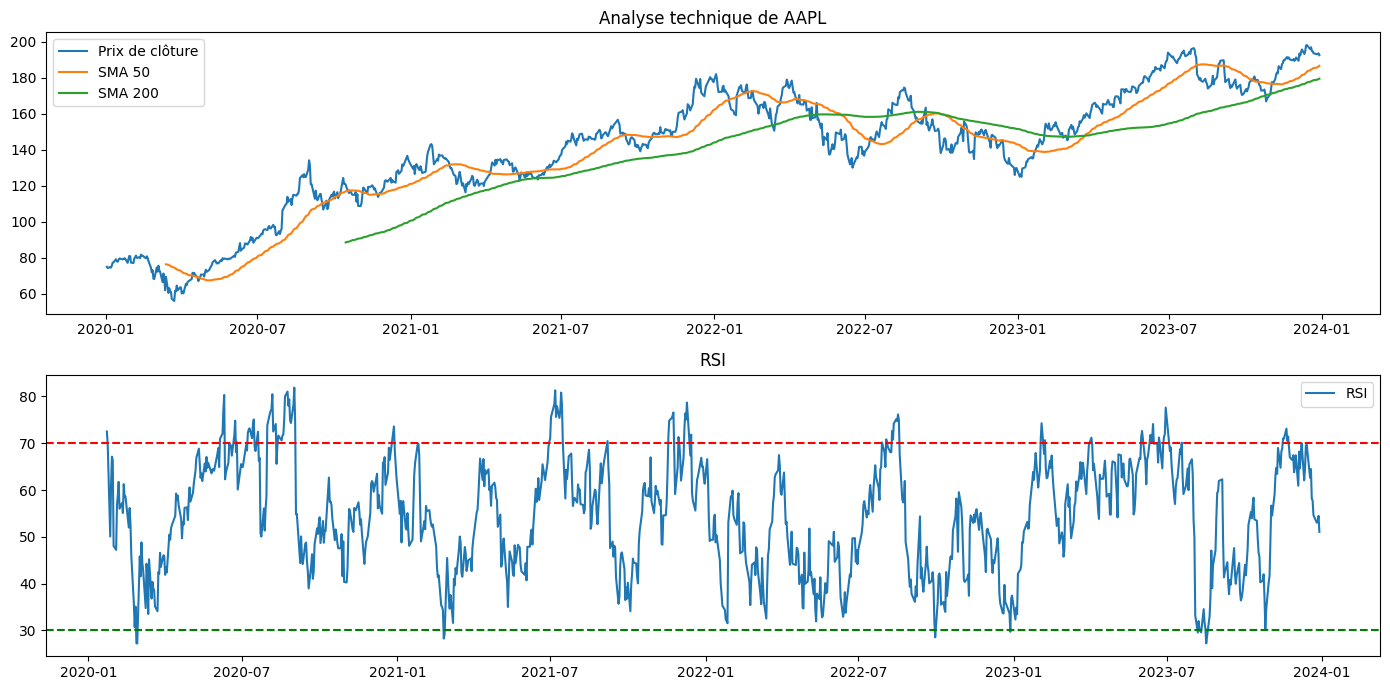

In [8]:
# Installer pandas-ta si ce n'est pas déjà fait
!pip install pandas-ta

import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt

# Télécharger les données de l'action
ticker = 'AAPL'  # Symbole boursier
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Calculer les indicateurs techniques avec pandas-ta
data['SMA_50'] = ta.sma(data['Close'], length=50)  # Moyenne mobile simple sur 50 jours
data['SMA_200'] = ta.sma(data['Close'], length=200)  # Moyenne mobile simple sur 200 jours
data['RSI'] = ta.rsi(data['Close'], length=14)  # Indice de Force Relative (RSI)

# Afficher les données avec les indicateurs
plt.figure(figsize=(14,7))

# Graphique des prix avec les moyennes mobiles
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Prix de clôture')
plt.plot(data['SMA_50'], label='SMA 50')
plt.plot(data['SMA_200'], label='SMA 200')
plt.title(f'Analyse technique de {ticker}')
plt.legend()

# Graphique du RSI
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')  # Ligne de surachat
plt.axhline(30, color='green', linestyle='--')  # Ligne de survente
plt.title('RSI')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Installer les bibliothèques nécessaires
!pip install pandas-ta yfinance plotly

import pandas as pd
import pandas_ta as ta
import yfinance as yf
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Télécharger les données de l'action
ticker = 'AAPL'  # Symbole boursier
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Calculer les indicateurs techniques avec pandas-ta
data['SMA_50'] = ta.sma(data['Close'], length=50)  # Moyenne mobile simple sur 50 jours
data['SMA_200'] = ta.sma(data['Close'], length=200)  # Moyenne mobile simple sur 200 jours
data['RSI'] = ta.rsi(data['Close'], length=14)  # Indice de Force Relative (RSI)

# Créer une figure avec deux sous-graphiques
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1, subplot_titles=('Prix de Clôture avec SMA', 'RSI'))

# Ajouter le graphique des prix de clôture avec les moyennes mobiles
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Prix de clôture'), row=1, col=1)

fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'],
                         line=dict(color='blue', width=2),
                         name='SMA 50'), row=1, col=1)

fig.add_trace(go.Scatter(x=data.index, y=data['SMA_200'],
                         line=dict(color='red', width=2),
                         name='SMA 200'), row=1, col=1)

# Ajouter le graphique du RSI
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'],
                         line=dict(color='purple', width=2),
                         name='RSI'), row=2, col=1)

# Ajouter des lignes de surachat et survente au RSI
fig.add_hline(y=70, line=dict(color='red', dash='dash'), row=2, col=1)
fig.add_hline(y=30, line=dict(color='green', dash='dash'), row=2, col=1)

# Ajuster la mise en page
fig.update_layout(title=f'Analyse technique de {ticker}',
                  yaxis_title='Prix',
                  yaxis2_title='RSI',
                  xaxis2_title='Date',
                  height=800,
                  showlegend=True)

# Afficher le graphique
fig.show()



[*********************100%%**********************]  1 of 1 completed


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Télécharger les données historiques d'une action (par exemple Apple)
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')

# Affichage des premières lignes du dataset
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687305,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689533,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021715,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944681,237458000


In [3]:
# Créer des caractéristiques simples basées sur les prix de clôture
data['SMA_10'] = data['Close'].rolling(window=10).mean()  # Moyenne mobile sur 10 jours
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # Moyenne mobile sur 50 jours
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # Moyenne mobile sur 200 jours
data['Target'] = data['Close'].shift(-1)  # La cible est le prix de clôture du jour suivant

# Supprimer les valeurs manquantes
data.dropna(inplace=True)

# Définir les features (X) et la cible (y)
features = ['Close', 'SMA_10', 'SMA_50', 'SMA_200']
X = data[features]
y = data['Target']


In [4]:
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [5]:
# Initialiser le modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Erreur quadratique moyenne (MSE): 188.8916260231204


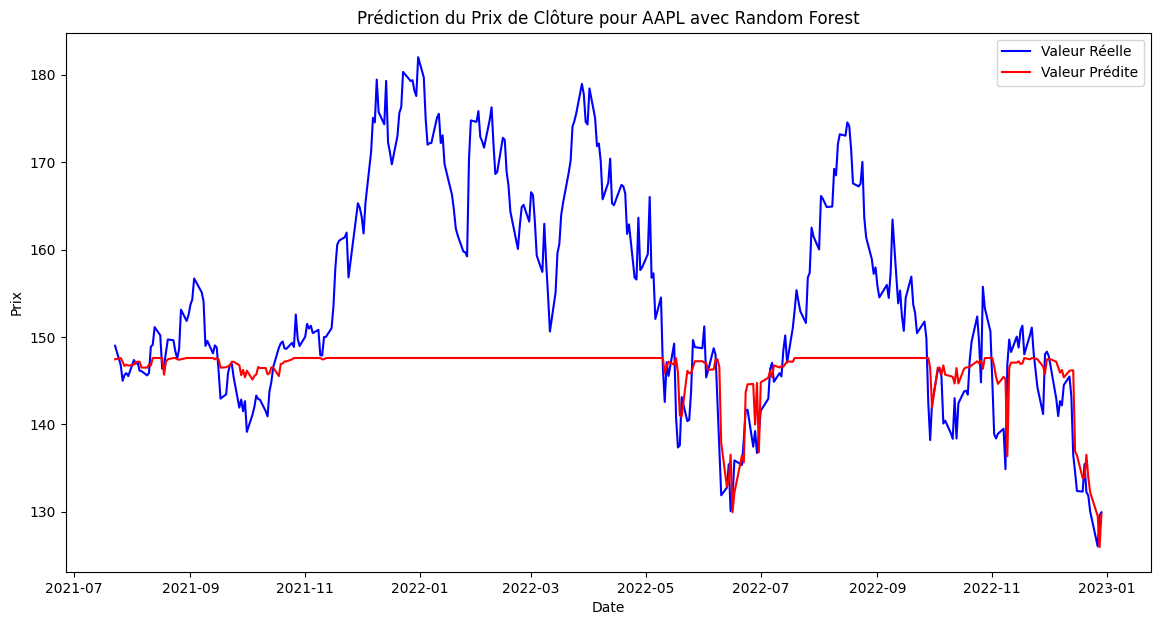

In [6]:
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f'Erreur quadratique moyenne (MSE): {mse}')

# Afficher la comparaison entre les valeurs réelles et prédites
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Valeur Réelle', color='blue')
plt.plot(y_test.index, y_pred, label='Valeur Prédite', color='red')
plt.title(f'Prédiction du Prix de Clôture pour {ticker} avec Random Forest')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()
